# Random Forest - Model Training

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [9]:
dataset = pd.read_csv('Dataset/fft_combined_metrics.csv')

## Visualize Dataset

In [10]:
dataset.head()

,Mean_X,Std Dev_X,Energy_X,Entropy_X,Peaks_X,Mean_Y,Std Dev_Y,Energy_Y,Entropy_Y,Peaks_Y,...,Std Dev_Z,Energy_Z,Entropy_Z,Peaks_Z,Mean_Mixed,Std Dev_Mixed,Energy_Mixed,Entropy_Mixed,Peaks_Mixed,category
0,1.172719,0.953548,228.452251,2.865350,29,1.931631,1.361601,558.515526,3.218825,31,...,0.658508,130.824569,3.302440,32,1.443353,2.654877,913.163896,0.613507,36,1
1,1.163221,0.958761,227.230673,2.881920,29,1.952115,1.346225,562.307429,3.220042,31,...,0.667691,133.851993,3.386925,30,1.449463,2.662081,918.761645,0.613295,36,1
2,1.182756,0.936522,227.598408,2.218724,29,1.957486,1.349040,565.166173,3.321991,31,...,0.670604,135.547673,3.013327,32,1.448431,2.671869,923.683803,0.612855,36,1
3,1.175147,0.940437,226.539145,2.278367,29,2.011669,1.374634,593.642824,3.225947,34,...,0.684978,138.293642,3.495668,31,1.498116,2.700763,953.847164,0.611485,34,1
4,1.171057,0.945039,226.447322,2.310572,29,2.023791,1.413078,609.251935,3.003790,32,...,0.696539,139.649782,3.947268,29,1.505199,2.727926,970.720591,0.610666,36,1


In [11]:
print(dataset.isnull().sum())

Mean_X           0
Std Dev_X        0
Energy_X         0
Entropy_X        0
Peaks_X          0
Mean_Y           0
Std Dev_Y        0
Energy_Y         0
Entropy_Y        0
Peaks_Y          0
Mean_Z           0
Std Dev_Z        0
Energy_Z         0
Entropy_Z        0
Peaks_Z          0
Mean_Mixed       0
Std Dev_Mixed    0
Energy_Mixed     0
Entropy_Mixed    0
Peaks_Mixed      0
category         0
dtype: int64


## Seperate X-Y values, Train-Test values

In [13]:
X = dataset[::-1]
y = dataset['category']

## Train the Model - Basics

### Train the Model

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

### Predict test set from the model and check accuracy

In [16]:
predict = model.predict(X_test)

In [17]:
accuracy_score(Y_test, predict)

0.9958053691275168

In [18]:
confusion_matrix(Y_test, predict)

array([[253,   1,   0,   0,   0],
       [  0, 233,   0,   0,   0],
       [  0,   2, 239,   0,   0],
       [  0,   0,   0, 235,   2],
       [  0,   0,   0,   0, 227]], dtype=int64)

In [19]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       254
           2       0.99      1.00      0.99       233
           3       1.00      0.99      1.00       241
           4       1.00      0.99      1.00       237
           5       0.99      1.00      1.00       227

    accuracy                           1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192



### Cross validation 

In [21]:
scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.8754717  0.98993711 0.99496855 1.         0.75944584]
Mean cross-validation score: 0.9239646404638563


## Train the Model - Finding the BEST Case

### No.of Decision Trees

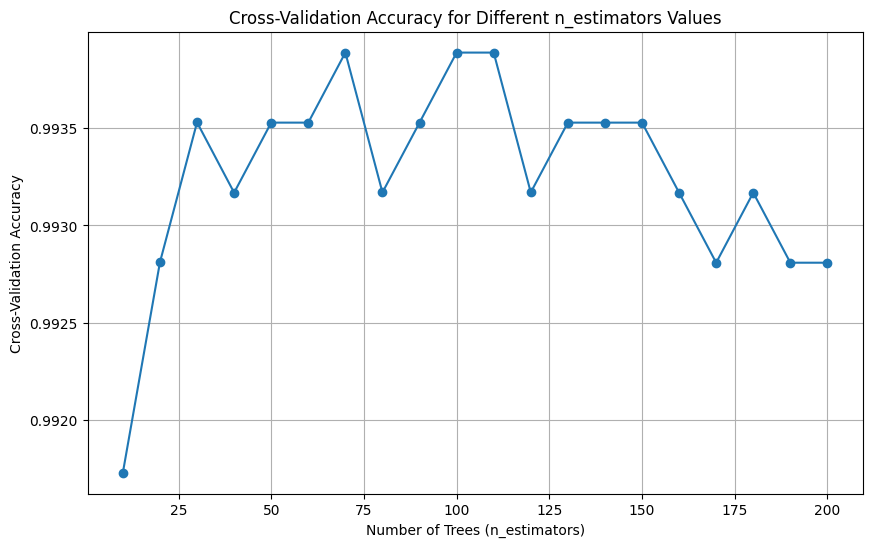

The optimal number of trees is 70 with cross-validation accuracy of 0.9939


In [22]:
n_estimators_range = range(10, 201, 10)  # n_estimators: DECISION TREES
cross_validation_scores = []

for n_estimator in n_estimators_range:
    modelRF = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    scores = cross_val_score(modelRF, X_train, Y_train, cv=10)  # 10-fold cross validation
    cross_validation_scores.append(scores.mean()) # Mean cross-validation score

# Plot the cross-validation accuracy against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cross_validation_scores, marker='o')
plt.title('Cross-Validation Accuracy for Different n_estimators Values')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal n_estimators value
optimal_n_estimators = n_estimators_range[np.argmax(cross_validation_scores)]
print(f"The optimal number of trees is {optimal_n_estimators} with cross-validation accuracy of {max(cross_validation_scores):.4f}")

In [23]:
# Define the range of test sizes to evaluate
test_sizes = np.linspace(0.1, 0.4, 10)
test_size_list= []

for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(modelRF, X_train, Y_train, cv=10)  # 10-fold cross validation
    test_size_list.append(scores.mean()) # Mean cross-validation score

# Plot the cross-validation accuracy against test sizes
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, test_size_list, marker='o')
plt.title('Cross-Validation Accuracy for Different Test Sizes')
plt.xlabel('Test Size')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal test size
optimal_test_size = test_sizes[np.argmax(test_size_list)]
print(f"The optimal test size is {optimal_test_size:.2f} with cross-validation accuracy of {max(test_size_list):.4f}")

NameError: name 'Y' is not defined